# Student Performance Indicator

### Lifecycle of machine learning Project
- Understanding the problem statement
- Data Collection
- Data checks to perform
- EDA
- Data Pre-processing
- Model Training
- Choose Best model
    

## 1. Problem Statement
- This project understands how the student's performance (test scores) is affected by other variable such as Gender,Ethnicity, Pariential Level pf education, lunch and test prep course.

## 2. Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

## 2.1 Import Data and Required Packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warning Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing the CSV as Pandas dataframe

In [3]:
df =pd.read_csv('data/stud.csv')

### Showing top five record

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of data

In [5]:
df.shape

(1000, 8)

## 2.2 Dataset Information

- Gender => (Male/ female)
- Race Ethinicity => (Group A, B, C, etc)
- Parential Level of Education => Parents final Qualification
- lunch => Type of lunch having before Exam
- Test Preparation Course => Does Student complete the course before exam
- Math Score, Reading Score, Writing Score =>  Marks of every subject


### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

## 3.1 Checking Missing Values

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no any missing values.

## 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

0

## 3.3 Check Data type

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the num,ber of Unique value of each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## 3.4 Check Statistics of Dataset

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight

- All mean are close to each other 66 - 68.05
- SD are also close to each other betwn 14.6 - 15.19
- Min of math is much lower as compared to other 

## 3.7 Exploring Data

In [11]:
categorical_column_name = [name for name in df.columns if df[name].dtype == 'O']
numerical_column_name = [name for name in df.columns if df[name].dtype != 'O']
for name in categorical_column_name:
    print(f"Category in '{name}' variable: {df[name].unique()}\n")

print(f'\n\n\n\n\n\nNo of categorical Feature({len(categorical_column_name)}): {categorical_column_name}')
print(f'No of numeric Feature({len(numerical_column_name)}): {numerical_column_name}')



Category in 'gender' variable: ['female' 'male']

Category in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']

Category in 'parental_level_of_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Category in 'lunch' variable: ['standard' 'free/reduced']

Category in 'test_preparation_course' variable: ['none' 'completed']







No of categorical Feature(5): ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
No of numeric Feature(3): ['math_score', 'reading_score', 'writing_score']


In [12]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score']/3

In [13]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


p

In [14]:
reading_full = df[df['reading_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score'] == 100]['average_score'].count()
math_full = df[df['math_score'] == 100]['average_score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [15]:
reading_less_20 = df[df['reading_score'] <=20 ]['average_score'].count()
writing_less_20 = df[df['writing_score'] <=20 ]['average_score'].count()
math_less_20 = df[df['math_score'] <=20 ]['average_score'].count()

print(f'Number of students with less then 20 marks in Maths: {math_less_20}')
print(f'Number of students with less then 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less then 20 marks in Reading: {reading_less_20}')

Number of students with less then 20 marks in Maths: 4
Number of students with less then 20 marks in Writing: 3
Number of students with less then 20 marks in Reading: 1


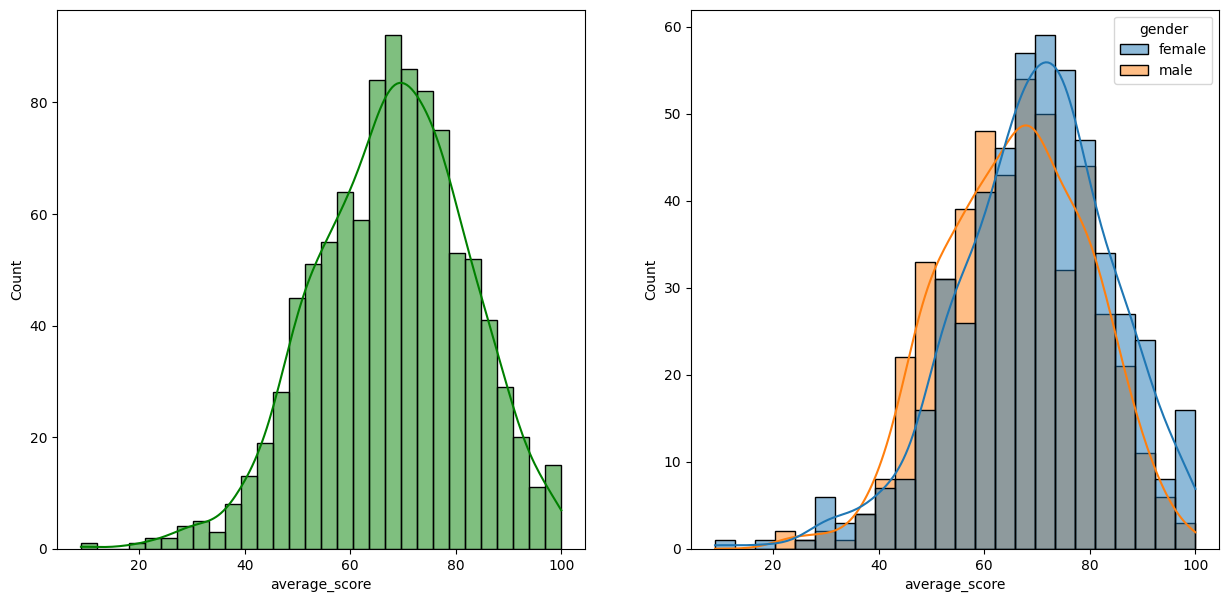

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

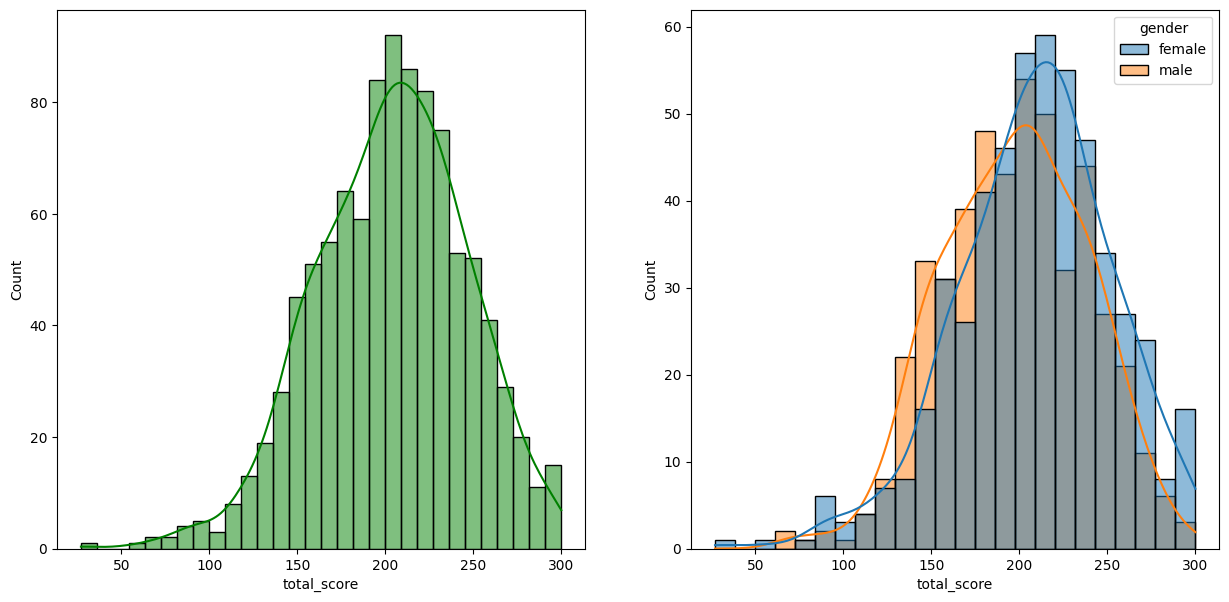

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()